<a href="https://colab.research.google.com/github/2002hk/Kaggle_competitions/blob/main/Titanic_survival_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241002%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241002T043901Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da5d0836858679edcfd865f6413668080494962fc0e70fda662edac3c6a5519b29fff1a7bd8db50ec6085b06b49eede91a4191e30bf0d94fe954ecfe6e879a71273ed59c547081e018a53686fd1d3aed96b8b936d25b974a781ba5332c1c048e21ed394e4153275ab74346efc055dabcc47050b99080dd38ec97f97c5c46ad09c681085c591091d3d6a7b08c0c5aeb3da668b8b185b878afa3b5dc1626e297dff0f8466803160c810939cd35494cfa22c394ba268d769279ba3f606cc04c314a729e0b2bb249f2facb192040637c978de89dc163b1a7ca9f9132da7b8afb92ec13d36b8a78de1a52cae419bcf0ff55cc86135789ffef7a2d97fb045cf286c4ccd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv


In [4]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data[(train_data['Sex']=='female') & (train_data['Survived']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [7]:
total_women=train_data[train_data['Sex']=='female'].shape[0]
survived_women=train_data[(train_data['Sex']=='female') & (train_data['Survived']==1)].shape[0]
percentage_survived_women=(survived_women/total_women)*100
print(percentage_survived_women)

74.20382165605095


In [8]:
total_men=train_data[train_data['Sex']=='male'].shape[0]
survived_men=train_data[(train_data['Sex']=='male') & (train_data['Survived']==1)].shape[0]
percentage_survived_men=(survived_men/total_men)*100
print(percentage_survived_men)

18.890814558058924


In [9]:
data=train_data.drop(['Ticket','Cabin','PassengerId'],axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [10]:
title=set()
for name in train_data["Name"]:
    title.add(name.split(",")[1].split(".")[0].strip())
print(title)

{'Mrs', 'Mme', 'Dr', 'Mlle', 'Don', 'Rev', 'Major', 'Mr', 'Col', 'Master', 'Ms', 'Lady', 'Sir', 'the Countess', 'Capt', 'Jonkheer', 'Miss'}


In [11]:
titles={'Sir':"officer",'Mme':"normald",'Mr':"norm",'Master':"normald",'Don':"officer",'Miss':"normald",'Lady':"normald",'Mlle':"normald",'Col':"officer",'Ms':"normald",'the Countess':"royal",'Mrs':"normald",'Major':"officer",'Capt':"officer",'Dr':"officer",'Rev':"officer",'Jonkheer':"royal"}

In [12]:
data["Name"]=data["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())
data["Name"]=data.Name.map(titles)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,norm,male,22.0,1,0,7.2500,S
1,1,1,normald,female,38.0,1,0,71.2833,C
2,1,3,normald,female,26.0,0,0,7.9250,S
3,1,1,normald,female,35.0,1,0,53.1000,S
4,0,3,norm,male,35.0,0,0,8.0500,S
5,0,3,norm,male,NaN,0,0,8.4583,Q
6,0,1,norm,male,54.0,0,0,51.8625,S
7,0,3,normald,male,2.0,3,1,21.0750,S
8,1,3,normald,female,27.0,0,2,11.1333,S
9,1,2,normald,female,14.0,1,0,30.0708,C


In [13]:
data.Sex=data.Sex.map({'female':0,'male':1})
data.Embarked=data.Embarked.map({'S':0,'Q':1,'C':2})
data.Name=data.Name.map({"royal":0,"normald":1,"officer":2,"norm":3})
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,3,1,22.0,1,0,7.2500,0.0
1,1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,1,0,26.0,0,0,7.9250,0.0
3,1,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,3,1,35.0,0,0,8.0500,0.0


In [14]:
data.Age.mean()

29.69911764705882

In [15]:
data['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [16]:
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    int64  
 3   Sex       712 non-null    int64  
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 55.6 KB


In [18]:
data.Age.std()

14.49293290032352

In [19]:
data["Age"]=round((data.Age.mean()/data.Age.std()))
data["Fare"]=round((data.Fare.mean()/data.Fare.std()))

In [20]:
data.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.0,712.000000,712.000000,712.0,712.000000
mean,0.404494,2.240169,2.141854,0.636236,2.0,0.514045,0.432584,1.0,0.404494
std,0.491139,0.836854,0.981311,0.481420,0.0,0.930692,0.854181,0.0,0.779038
min,0.000000,1.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.0,0.000000,0.000000,1.0,0.000000
50%,0.000000,2.000000,3.000000,1.000000,2.0,0.000000,0.000000,1.0,0.000000
75%,1.000000,3.000000,3.000000,1.000000,2.0,1.000000,1.000000,1.0,0.000000
max,1.000000,3.000000,3.000000,1.000000,2.0,5.000000,6.000000,1.0,2.000000


In [21]:
data['Embarked'] = data['Embarked'].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
 1   Pclass    712 non-null    int64
 2   Name      712 non-null    int64
 3   Sex       712 non-null    int64
 4   Age       712 non-null    int64
 5   SibSp     712 non-null    int64
 6   Parch     712 non-null    int64
 7   Fare      712 non-null    int64
 8   Embarked  712 non-null    int64
dtypes: int64(9)
memory usage: 55.6 KB


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    data.drop(["Survived"],axis=1),
    data.Survived,
    test_size=0.2,
    random_state=0,
    stratify=data.Survived
)

In [62]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(learning_rate='adaptive', eta0=0.01, max_iter=500)

# Fit the model
sgd_clf.fit(x_train, y_train)

SGDClassifier(eta0=0.01, learning_rate='adaptive', max_iter=500)

In [63]:
y_pred = sgd_clf.predict(x_test)
print(y_pred)

[1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]


In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.361866125760649
0.8461538461538461


In [27]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df=test.drop(['Ticket','Cabin','PassengerId'],axis=1)

In [29]:
title=set()
for name in train_data["Name"]:
    title.add(name.split(",")[1].split(".")[0].strip())
print(title)

{'Mrs', 'Mme', 'Dr', 'Mlle', 'Don', 'Rev', 'Major', 'Mr', 'Col', 'Master', 'Ms', 'Lady', 'Sir', 'the Countess', 'Capt', 'Jonkheer', 'Miss'}


In [30]:
titles={'Sir':"officer",'Mme':"normald",'Mr':"norm",'Master':"normald",'Don':"officer",'Miss':"normald",'Lady':"normald",'Mlle':"normald",'Lady':"normald",'Mlle':"normald",'Col':"officer",'Ms':"normald",'the Countess':"royal",'Mrs':"normald",'Major':"officer",'Capt':"officer",'Dr':"officer",'Rev':"officer",'Jonkheer':"royal"}

In [31]:
df["Name"]=df["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())
df["Name"]=df.Name.map(titles)
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,norm,male,34.5,0,0,7.8292,Q
1,3,normald,female,47.0,1,0,7.0000,S
2,2,norm,male,62.0,0,0,9.6875,Q
3,3,norm,male,27.0,0,0,8.6625,S
4,3,normald,female,22.0,1,1,12.2875,S
5,3,norm,male,14.0,0,0,9.2250,S
6,3,normald,female,30.0,0,0,7.6292,Q
7,2,norm,male,26.0,1,1,29.0000,S
8,3,normald,female,18.0,0,0,7.2292,C
9,3,norm,male,21.0,2,0,24.1500,S


In [32]:
df.Sex=df.Sex.map({'female':0,'male':1})
df.Embarked=df.Embarked.map({'S':0,'Q':1,'C':2})
df.Name=df.Name.map({"royal":0,"normald":1,"officer":2,"norm":3})
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,3.0,1,34.5,0,0,7.8292,1
1,3,1.0,0,47.0,1,0,7.0000,0
2,2,3.0,1,62.0,0,0,9.6875,1
3,3,3.0,1,27.0,0,0,8.6625,0
4,3,1.0,0,22.0,1,1,12.2875,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      417 non-null    float64
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


In [34]:
df['Age']

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,NaN
414,39.0
415,38.5
416,NaN


In [35]:
sample=df

In [36]:
sample['Age']

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,NaN
414,39.0
415,38.5
416,NaN


In [37]:
sample.Age.fillna(sample.Age.mean(),inplace=True)

In [38]:
sample['Age']

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


In [39]:
sample['Fare']

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


In [40]:
sample["Fare"]=sample["Fare"].fillna(sample["Fare"].mean())

In [41]:
sample['Fare']

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


In [42]:
sample.Name.fillna(sample.Name.mean(),inplace=True)

<ipython-input-42-65509a1de3bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample.Name.fillna(sample.Name.mean(),inplace=True)


In [43]:
sample['Name']

,Name
0,3.00000
1,1.00000
2,3.00000
3,3.00000
4,1.00000
...,...
413,3.00000
414,2.16307
415,3.00000
416,3.00000


In [44]:
sample["Age"]=round((sample.Age.mean()/sample.Age.std()))
sample["Fare"]=round((sample.Fare.mean()/sample.Fare.std()))

In [45]:
y_pred = sgd_clf.predict(sample)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [46]:
submission=pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":y_pred
    })
submission.to_csv("submission_titanic.csv",index=False)

In [47]:
pred_sample=pd.read_csv("submission_titanic.csv")

In [48]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

<Axes: xlabel='Survived', ylabel='count'>

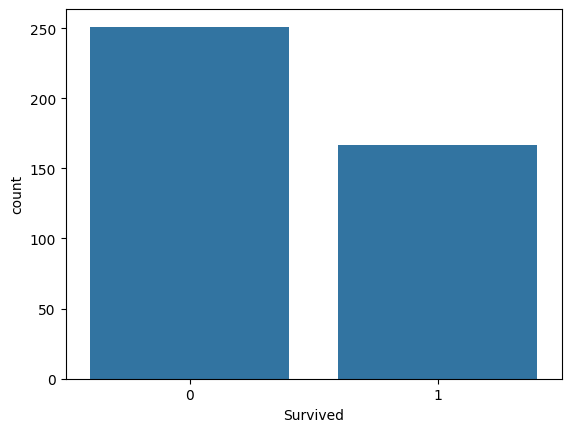

In [49]:
sns.countplot(x="Survived",data=pred_sample)